# Sentiments Analysis

## 1. Introduction



## 2. Getting Started

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
Train = pd.read_csv("E:/Data Science/Innoplexus/Input/train_F3WbcTw.csv")
Test = pd.read_csv("E:/Data Science/Innoplexus/Input/test_tOlRoBf.csv")
Sample_submission = pd.read_csv("E:/Data Science/Innoplexus/Input/sample_submission_i5xnIZD.csv")

## 2. Understanding the data

In [3]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

Number of rows and columns in train dataset: (5279, 4)
Number of rows and columns in test dataset: (2924, 3)


In [4]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 4 columns):
unique_hash    5279 non-null object
text           5279 non-null object
drug           5279 non-null object
sentiment      5279 non-null int64
dtypes: int64(1), object(3)
memory usage: 165.0+ KB
-----------------Variable Structure of test data------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
unique_hash    2924 non-null object
text           2924 non-null object
drug           2924 non-null object
dtypes: object(3)
memory usage: 68.6+ KB


 
> No missing value has been observed in this data.

Let's reconfirm missing value in another step as well.

In [5]:
print("Missing value in Train data:", Train.isnull().sum().sum())
print("Missing value in Test data:", Test.isnull().sum().sum())

Missing value in Train data: 0
Missing value in Test data: 0


> It got confirmed that this dataset does not contain any missing value.

Let's look at top 5 rowsof train dataset:

In [6]:
# Top 5 rows
Train.head(5)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


Now, let's look at distribution of label:

In [8]:
# Checking distribution of Product_Category
print("The unique number of Product Categories: ",len(Train['sentiment'].unique()))
print("Below are the distribution of each categories in Train data:")
Train['sentiment'].value_counts(normalize = True)

The unique number of Product Categories:  3
Below are the distribution of each categories in Train data:


2    0.724569
1    0.158553
0    0.116878
Name: sentiment, dtype: float64

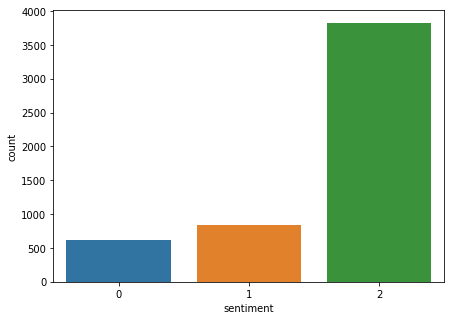

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'sentiment', data = Train);

> It is clearly visible from above analysis that we are dealing with **unbalanced classification** problem.

## 3. Data Preprocessing

Let's preprocess our data for building classification model. As we already discussed above that our main variable of interest is **text and drug**. On this variable, we are going to apply various NLP techniques.

In [12]:
Train['text_new'] = Train['drug'] + ' ' + Train['text']
Train.head(5)

,unique_hash,text,drug,sentiment,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,gilenya Autoimmune diseases tend to come in cl...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,gilenya I can completely understand why you’d ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,fingolimod Interesting that it only targets S1...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,"ocrevus Very interesting, grand merci. Now I w..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,"gilenya Hi everybody, My latest MRI results fo..."


### 3.1 Making lowercase

At first, we will convert all words in **tweet** as lowercase. This is generally a good idea as many text classification tools rely on counting the occurrences of words. If both upper and lower case versions of the same word are found in the text then the algorithm will count them as different words even though the meaning is the same. 

In [13]:
# Making lowercase
Train['text_new'] = Train['text_new'].str.lower()
Train.head(5)

,unique_hash,text,drug,sentiment,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,gilenya autoimmune diseases tend to come in cl...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,gilenya i can completely understand why you’d ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,fingolimod interesting that it only targets s1...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,"ocrevus very interesting, grand merci. now i w..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,"gilenya hi everybody, my latest mri results fo..."


### 3.2 Removing Punctuations, Numbers, and Special Characters

Since punctuations, numbers and special characters do not help much, It is better to remove them from the tweet. Here we will replace everything except characters and hashtags with spaces.

In [14]:
# remove special characters, numbers, punctuations
Train['text_new'] = Train['text_new'].str.replace("[^a-zA-Z]", " ")
Train.head(5)

,unique_hash,text,drug,sentiment,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,gilenya autoimmune diseases tend to come in cl...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,gilenya i can completely understand why you d ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,fingolimod interesting that it only targets s ...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,ocrevus very interesting grand merci now i w...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,gilenya hi everybody my latest mri results fo...


### 3.3 Removing Stop Words

'Stop words'are commonly used words that are unlikely to have any benefit in natural language processing. These includes words such as ‘a’, ‘the’, ‘is’.

In this step, we are removing all such words.

In [15]:
# removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))                  

Train['text_new'] = Train['text_new'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
Train.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,unique_hash,text,drug,sentiment,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,gilenya autoimmune diseases tend come clusters...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,gilenya completely understand want try results...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,fingolimod interesting targets p receptors rat...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,ocrevus interesting grand merci wonder lemtrad...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,gilenya hi everybody latest mri results brain ...


### 3.4 Tokenization

Tokenization refers to dividing the text into a sequence of words or sentences.



In [16]:
# Tokenize the words for it to use
tokenized_tweet = Train['text_new'].apply(lambda x: x.split())
tokenized_tweet[0:5,]

0    [gilenya, autoimmune, diseases, tend, come, cl...
1    [gilenya, completely, understand, want, try, r...
2    [fingolimod, interesting, targets, p, receptor...
3    [ocrevus, interesting, grand, merci, wonder, l...
4    [gilenya, hi, everybody, latest, mri, results,...
Name: text_new, dtype: object

### 3.5 Lemmatization


Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [17]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet[0:5,]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


0    [gilenya, autoimmune, disease, tend, come, clu...
1    [gilenya, completely, understand, want, try, r...
2    [fingolimod, interesting, target, p, receptor,...
3    [ocrevus, interesting, grand, merci, wonder, l...
4    [gilenya, hi, everybody, latest, mri, result, ...
Name: text_new, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  
Train['text_new'] = tokenized_tweet
Train.head(5)

,unique_hash,text,drug,sentiment,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,gilenya autoimmune disease tend come cluster g...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,gilenya completely understand want try result ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,fingolimod interesting target p receptor rathe...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,ocrevus interesting grand merci wonder lemtrad...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,gilenya hi everybody latest mri result brain c...


### 3.6 Wordcloud

In [20]:
!pip install wordcloud

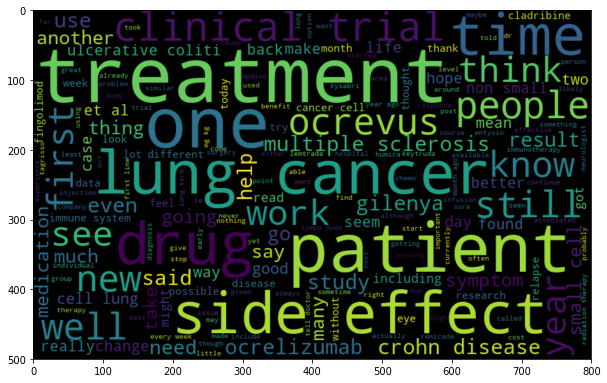

In [21]:
## 3.6 Wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

all_words = ' '.join([text for text in Train['text_new']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 123, min_font_size = 10, max_font_size = 110,
                stopwords = stopwords).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.show();

### 3.7 Collecting all preprocessing steps in one function

Let's create a function for all above steps so that it can be reusable with minimum time of coding.

In [22]:
# Creating function for preprocessing
def clean_and_tokenize_tweets(data):
    data['text_new'] = data['drug'] + ' ' + data['text']
    # Making lowercase
    data['text_new'] = data['text_new'].str.lower()
  
    # remove special characters, numbers, punctuations
    data['text_new'] = data['text_new'].str.replace("[^a-zA-Z]", " ")
  
    # removing stop words
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop = set(stopwords.words("english"))                  
    data['text_new'] = data['text_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  
    # Tokenize the words for it to use
    tokenized_tweet = data['text_new'].apply(lambda x: x.split())
  
    # Lemmatization
    nltk.download('wordnet')
    from nltk.stem.wordnet import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
  
    # Stiching back together
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
    data['text_new'] = tokenized_tweet
    return data


In [23]:
# Applying Preprocessing function on Training data
Train_data = clean_and_tokenize_tweets(Train)
Train_data.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,unique_hash,text,drug,sentiment,text_new
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,gilenya autoimmune disease tend come cluster g...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,gilenya completely understand want try result ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,fingolimod interesting target p receptor rathe...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,ocrevus interesting grand merci wonder lemtrad...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,gilenya hi everybody latest mri result brain c...


In [24]:
# Applying Preprocessing function on Test data
Test_data = clean_and_tokenize_tweets(Test)
Test_data.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,unique_hash,text,drug,text_new
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,fingolimod previously stable natalizumab switc...
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,fingolimod fingolimod since december way descr...
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,humira apparently shingle red spot left breast...
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,tagrisso docetaxel week x week week claim le h...
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,stelara cc stelara worked matter day gi willin...


## 4. Building a Classifier

After cleanup, it is time to build the classifier to identify Product Categories. At first, we are dividing our data into train and test set.

### 4.1 Dividing data into train and validation set

Before training the model, let's split the training data into a training and validation set.



In [25]:
# Dividing data into train and validation set
from sklearn.model_selection import train_test_split

validation_percent = 0.20
test_percent = 0.50
seed = 786

X_train, X_validation, y_train, y_validation = train_test_split(Train_data['text_new'], Train_data['sentiment'], test_size = validation_percent, random_state = seed, stratify = Train_data['sentiment'])
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size = test_percent, random_state = seed, stratify = y_validation)

# Shape of data
print("Number of rows and columns in train dataset:",X_train.shape)
print("Number of rows and columns in validation dataset:",X_validation.shape)
print("Number of rows and columns in test dataset:",X_test.shape)

print("Number of rows and columns in target variable for training:",y_train.shape)
print("Number of rows and columns in target variable for validation:",y_validation.shape)
print("Number of rows and columns in target variable for test:",y_test.shape)


Number of rows and columns in train dataset: (4223,)
Number of rows and columns in validation dataset: (528,)
Number of rows and columns in test dataset: (528,)
Number of rows and columns in target variable for training: (4223,)
Number of rows and columns in target variable for validation: (528,)
Number of rows and columns in target variable for test: (528,)


### 4.2 Training

 In the training stage, we are creating a pipeline with following two steps:
 
  1. Extracting Features from Cleaned Tweets
      + Bag of words and 
      + TF-IDF.
  2. Building classifier

**Extracting Features from Cleaned Tweets**
---
To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. Here, we are using TF-IDF.

**Bag of Words (BoW)**

Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

**TF-IDF Features**

This is another method which is based on the frequency method but it is different to the **bag-of-words** approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

 + TF = (Number of times term t appears in a document)/(Number of terms in the document)
 + IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
 + TF-IDF = TF*IDF


 **Building classifier**
---
We are starting with simple models and then we will proceed with more complex models. Below are the schematic of our classifier training:

**Classifier tested**: We are testing below classifier in this problem:

 1. Logistic regression classifier
 2. Naive Bayes classifier
 3. Stochastic gradient descent classifier
 4. Support vector machine with Gaussian kernel
 5. K-Nearest Neighbor classifier
 6. Decision Tree classifier
 7. Random Forest classifier
 8. Gradient boosting classifier
 9. Extreme gradient boosting classifier


**Validation scheme**: We are using below method of validating our classifier

 1. External validation: hold-out sample data
 2. Internal validation: 10-Fold cross validation
 
 **Validation metric:** We are testing performance of model based on **F1 Score** metric. Below is the short detail on **F1 Score**:
 
 To understand **F1 Score**, let's understand two more metric in detail which are **Precision** and **Recall**. Below are the formula for the same.
 
 $Precision: \frac{True Positive}{True Positive + False Positive}$
 
 $Recall: \frac{True Positive}{True Positive + False Negative}$
 
 <br>
 <br>
 
 Hence, **F1 Score** can be defined as
 
 $F1: \frac{2*Precision * Recall}{Precision + Recall}$
 
 First, let's import all important libraries for this problem statement.


In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

#### 4.2.1 Iteration 1: BoW + Logistic Regression

Let's crete basic model and perform validation using validation data and cross validation.

In [28]:
# Fitting Logistic Regression model
seed = 786

#pipeline_LR = Pipeline([
    #('vect', CountVectorizer()),
    #('tfidf',  TfidfTransformer()),
    #('LR', LogisticRegression(random_state=seed)),
#])

pipeline_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('LR', LogisticRegression(random_state=seed)),
])

model_LR = pipeline_LR.fit(X_train, y_train)

# Scoring based on F1 score for hold out sample
y_predict_LR = model_LR.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_LR, average="macro")
print(classification_report(y_validation, y_predict_LR))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
skf = StratifiedKFold(n_splits=10, random_state=seed)
scores_cv = cross_val_score(model_LR, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.24      0.13      0.17        61
           1       0.47      0.33      0.39        84
           2       0.77      0.87      0.82       383

   micro avg       0.70      0.70      0.70       528
   macro avg       0.49      0.45      0.46       528
weighted avg       0.66      0.70      0.67       528

F1 Score for hold-out sample data: 45.86
F1 Score based on cross validation: 44.36


In [29]:
# Fitting Logistic Regression model
seed = 786

pipeline_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('LR', LogisticRegression(random_state=seed)),
])

model_LR = pipeline_LR.fit(X_train, y_train)

# Scoring based on F1 score for hold out sample
y_predict_LR = model_LR.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_LR, average="macro")
print(classification_report(y_validation, y_predict_LR))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
skf = StratifiedKFold(n_splits=10, random_state=seed)
scores_cv = cross_val_score(model_LR, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.70      0.08      0.15        84
           2       0.74      1.00      0.85       383

   micro avg       0.74      0.74      0.74       528
   macro avg       0.48      0.36      0.33       528
weighted avg       0.65      0.74      0.64       528

F1 Score for hold-out sample data: 33.23
F1 Score based on cross validation: 32.31


Let's optimize further this model by performing hyperparameter tuning.

In [0]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print(__doc__)
# Set the parameters by cross-validation
tuned_parameters = [{'LR__penalty': ['l1','l2'],
                     'LR__C': [1, 10, 100, 500]
                     }]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        estimator=pipeline_LR,
        param_grid=tuned_parameters,
        cv=10, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_validation, clf.predict(X_validation)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'LR__C': 1, 'LR__penalty': 'l2'}

Grid scores on development set:

0.846 (+/-0.029) for {'LR__C': 1, 'LR__penalty': 'l1'}
0.847 (+/-0.033) for {'LR__C': 1, 'LR__penalty': 'l2'}
0.826 (+/-0.031) for {'LR__C': 10, 'LR__penalty': 'l1'}
0.830 (+/-0.025) for {'LR__C': 10, 'LR__penalty': 'l2'}
0.820 (+/-0.031) for {'LR__C': 100, 'LR__penalty': 'l1'}
0.816 (+/-0.027) for {'LR__C': 100, 'LR__penalty': 'l2'}
0.822 (+/-0.023) for {'LR__C': 500, 'LR__penalty': 'l1'}
0.815 (+/-0.025) for {'LR__C': 500, 'LR__penalty': 'l2'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       589
           1       0.74      0.77      0.76       203

    accuracy                       

#### 4.2.2 Iteration 2:  BoW + Naive Bayes

We are using **Pipeline** from **`sklearn`** library to stich both preprocessing of text data and classifier testing. 

In [30]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [31]:
# Fitting Naive Bayes model
from sklearn.naive_bayes import GaussianNB
pipeline_NB = Pipeline([
    ('vect', CountVectorizer()),
    ('to_dense', DenseTransformer()),
    ('NB', GaussianNB()),
])

model_NB = pipeline_NB.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_NB = model_NB.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_NB, average="macro")
print(classification_report(y_validation, y_predict_NB))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_NB, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.20      0.11      0.15        61
           1       0.20      0.27      0.23        84
           2       0.75      0.74      0.75       383

   micro avg       0.59      0.59      0.59       528
   macro avg       0.38      0.38      0.37       528
weighted avg       0.60      0.59      0.59       528

F1 Score for hold-out sample data: 37.35
F1 Score based on cross validation: 37.47


#### 4.2.3 Iteration 3:  BoW + Stochastic gradient descent

In [32]:
# Stochastic gradient descent
seed = 786

pipeline_SGD = Pipeline([
    ('vect', CountVectorizer()),
    ('SGD', SGDClassifier(random_state=seed)),
])

model_SGD = pipeline_SGD.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_SGD = model_SGD.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_SGD, average="macro")
print(classification_report(y_validation, y_predict_SGD))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_SGD, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.22      0.23      0.22        61
           1       0.34      0.20      0.25        84
           2       0.76      0.82      0.79       383

   micro avg       0.66      0.66      0.66       528
   macro avg       0.44      0.42      0.42       528
weighted avg       0.63      0.66      0.64       528

F1 Score for hold-out sample data: 42.27
F1 Score based on cross validation: 41.51


In [0]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print(__doc__)
# Set the parameters by cross-validation
tuned_parameters = [{'SGD__penalty': ['l1','l2'],
                     'SGD__loss': ['hinge','log', 'modified_huber','squared_hinge','perceptron']
                     }]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        estimator=pipeline_SGD,
        param_grid=tuned_parameters,
        cv=10, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_validation, clf.predict(X_validation)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'SGD__loss': 'log', 'SGD__penalty': 'l2'}

Grid scores on development set:

0.816 (+/-0.026) for {'SGD__loss': 'hinge', 'SGD__penalty': 'l1'}
0.827 (+/-0.026) for {'SGD__loss': 'hinge', 'SGD__penalty': 'l2'}
0.825 (+/-0.029) for {'SGD__loss': 'log', 'SGD__penalty': 'l1'}
0.839 (+/-0.035) for {'SGD__loss': 'log', 'SGD__penalty': 'l2'}
0.801 (+/-0.036) for {'SGD__loss': 'modified_huber', 'SGD__penalty': 'l1'}
0.818 (+/-0.018) for {'SGD__loss': 'modified_huber', 'SGD__penalty': 'l2'}
0.795 (+/-0.027) for {'SGD__loss': 'squared_hinge', 'SGD__penalty': 'l1'}
0.823 (+/-0.017) for {'SGD__loss': 'squared_hinge', 'SGD__penalty': 'l2'}
0.804 (+/-0.032) for {'SGD__loss': 'perceptron', 'SGD__penalty': 'l1'}
0.815 (+/-0.036) for {'SGD__loss': 'perceptron', 'SGD__penalty': 'l2'}

Detailed classification report:

The model is trained on the full developmen

In [33]:
# Stochastic gradient descent
seed = 786

pipeline_SGD = Pipeline([
    ('vect', CountVectorizer()),
    ('SGD', SGDClassifier(random_state=seed, loss= 'log', penalty = 'l2')),
])

model_SGD = pipeline_SGD.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_SGD = model_SGD.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_SGD, average="macro")
print(classification_report(y_validation, y_predict_SGD))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_SGD, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.21      0.21      0.21        61
           1       0.36      0.29      0.32        84
           2       0.76      0.80      0.78       383

   micro avg       0.65      0.65      0.65       528
   macro avg       0.44      0.43      0.44       528
weighted avg       0.63      0.65      0.64       528

F1 Score for hold-out sample data: 43.67
F1 Score based on cross validation: 41.47


#### 4.2.4 Iteration 4:  BoW + Support Vector Machine with Gaussion kernel

In [34]:
# Support Vector Machine with Gaussion kernel
from sklearn.svm import SVC
seed = 786

pipeline_SVM = Pipeline([
    ('vect', CountVectorizer()),
    ('SVM', SVC(kernel='rbf', random_state=seed, gamma=0.01, C=1)),
])

model_SVM = pipeline_SVM.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_SVM = model_SVM.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_SVM, average="macro")
print(classification_report(y_validation, y_predict_SVM))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_SVM, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.50      0.01      0.02        84
           2       0.73      1.00      0.84       383

   micro avg       0.73      0.73      0.73       528
   macro avg       0.41      0.34      0.29       528
weighted avg       0.61      0.73      0.61       528

F1 Score for hold-out sample data: 28.79
F1 Score based on cross validation: 29.1


In [0]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print(__doc__)
# Set the parameters by cross-validation
tuned_parameters = [{'SVM__kernel': ['poly'],
                     'SVM__degree': [3,5],
                     'SVM__C': [1,10,100,1000],
                     'SVM__gamma': [0.0001,0.001,0.01,0.1]
                     }]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        estimator=pipeline_SVM,
        param_grid=tuned_parameters,
        cv=10, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_validation, clf.predict(X_validation)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'SVM__C': 100, 'SVM__degree': 3, 'SVM__gamma': 0.1, 'SVM__kernel': 'poly'}

Grid scores on development set:

0.427 (+/-0.000) for {'SVM__C': 1, 'SVM__degree': 3, 'SVM__gamma': 0.0001, 'SVM__kernel': 'poly'}
0.427 (+/-0.000) for {'SVM__C': 1, 'SVM__degree': 3, 'SVM__gamma': 0.001, 'SVM__kernel': 'poly'}
0.427 (+/-0.000) for {'SVM__C': 1, 'SVM__degree': 3, 'SVM__gamma': 0.01, 'SVM__kernel': 'poly'}
0.831 (+/-0.022) for {'SVM__C': 1, 'SVM__degree': 3, 'SVM__gamma': 0.1, 'SVM__kernel': 'poly'}
0.427 (+/-0.000) for {'SVM__C': 1, 'SVM__degree': 5, 'SVM__gamma': 0.0001, 'SVM__kernel': 'poly'}
0.427 (+/-0.000) for {'SVM__C': 1, 'SVM__degree': 5, 'SVM__gamma': 0.001, 'SVM__kernel': 'poly'}
0.427 (+/-0.000) for {'SVM__C': 1, 'SVM__degree': 5, 'SVM__gamma': 0.01, 'SVM__kernel': 'poly'}
0.710 (+/-0.022) for {'SVM__C': 1, 'SVM__degree': 5, 'SVM__gamma': 

In [0]:
# Support Vector Machine with Gaussion kernel
from sklearn.svm import SVC
seed = 786

pipeline_SVM = Pipeline([
    ('vect', CountVectorizer()),
    ('SVM', SVC(kernel='sigmoid', random_state=seed, gamma=0.001, C=100)),
])

model_SVM = pipeline_SVM.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_SVM = model_SVM.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_SVM, average="macro")
print(classification_report(y_validation, y_predict_SVM))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_SVM, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       589
           1       0.73      0.79      0.76       203

    accuracy                           0.87       792
   macro avg       0.83      0.84      0.84       792
weighted avg       0.88      0.87      0.87       792

F1 Score for hold-out sample data: 83.53
F1 Score based on cross validation: 86.14


#### 4.2.5 Iteration 5:  BoW + KNN



In [0]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
seed = 786

pipeline_KNN = Pipeline([
    ('vect', CountVectorizer()),
    ('KNN', KNeighborsClassifier(n_neighbors = 25)),
])

model_KNN = pipeline_KNN.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_KNN = model_KNN.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_KNN, average="macro")
print(classification_report(y_validation, y_predict_KNN))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_KNN, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1179
           1       0.63      0.76      0.69       405

    accuracy                           0.82      1584
   macro avg       0.77      0.80      0.78      1584
weighted avg       0.84      0.82      0.83      1584

F1 Score for hold-out sample data: 78.34
F1 Score based on cross validation: 78.0


#### 4.2.6 Iteration 6:  BoW + Decision Tree

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
seed = 786

pipeline_DT = Pipeline([
    ('vect', CountVectorizer()),
    ('DT', DecisionTreeClassifier(criterion='entropy', max_features = 'sqrt', random_state=seed)),
])

model_DT = pipeline_DT.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_DT = model_DT.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_DT, average="macro")
print(classification_report(y_validation, y_predict_DT))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_DT, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1179
           1       0.69      0.64      0.66       405

    accuracy                           0.84      1584
   macro avg       0.79      0.77      0.78      1584
weighted avg       0.83      0.84      0.83      1584

F1 Score for hold-out sample data: 77.79
F1 Score based on cross validation: 77.86


#### 4.2.7 Iteration 7:  BoW + RandomForest

In [0]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
seed = 786

pipeline_RF = Pipeline([
    ('vect', CountVectorizer()),
    ('RF', RandomForestClassifier(n_estimators=500, criterion='entropy', max_features = 'sqrt', random_state=seed)),
])

model_RF = pipeline_RF.fit(X_train, y_train)

print(__doc__)
# Set the parameters by cross-validation
#Number of trees
n_estimators = [500,750,1000]
# Criterion
criterion = ['entropy', 'gini']
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [10, 30, 50, 70, 90, 110]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

tuned_parameters = [{'RF__criterion': criterion,
                     'RF__max_features': max_features,
                     'RF__n_estimators': n_estimators 
             }]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        estimator=pipeline_RF,
        param_grid=tuned_parameters,
        cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_validation, clf.predict(X_validation)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 750}

Grid scores on development set:

0.856 (+/-0.017) for {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 500}
0.857 (+/-0.017) for {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 750}
0.857 (+/-0.017) for {'RF__criterion': 'entropy', 'RF__max_features': 'sqrt', 'RF__n_estimators': 1000}
0.852 (+/-0.022) for {'RF__criterion': 'entropy', 'RF__max_features': 'log2', 'RF__n_estimators': 500}
0.853 (+/-0.022) for {'RF__criterion': 'entropy', 'RF__max_features': 'log2', 'RF__n_estimators': 750}
0.854 (+/-0.020) for {'RF__criterion': 'entropy', 'RF__max_features': 'log2', 'RF__n_estimators': 1000}
0.855 (+/-0.016) for {'RF__criterion': 'gini', 'RF__max_features': 'sqrt', 'RF__n_estimators': 500}
0.856 (+/-0.015) f

In [0]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
seed = 786

pipeline_RF = Pipeline([
    ('vect', CountVectorizer()),
    ('RF', RandomForestClassifier(n_estimators=750, criterion='entropy', max_features = 'sqrt', random_state=seed)),
])

model_RF = pipeline_RF.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_RF = model_RF.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_RF, average="macro")
print(classification_report(y_validation, y_predict_RF))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
skf = StratifiedKFold(n_splits=10, random_state=seed)
scores_cv = cross_val_score(model_RF, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       589
           1       0.77      0.78      0.77       203

    accuracy                           0.88       792
   macro avg       0.85      0.85      0.85       792
weighted avg       0.88      0.88      0.88       792

F1 Score for hold-out sample data: 84.67
F1 Score based on cross validation: 85.45


#### 4.2.8 Iteration 8:  BoW + Gradient boosting

In [0]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
seed = 786

pipeline_GB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('GB', GradientBoostingClassifier(n_estimators=700, max_features = 'sqrt', random_state=seed)),
])

model_GB = pipeline_GB.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_GB = model_GB.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_GB, average="macro")
print(classification_report(y_validation, y_predict_GB))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_GB, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1768
           1       0.80      0.71      0.75       608

    accuracy                           0.88      2376
   macro avg       0.85      0.82      0.84      2376
weighted avg       0.88      0.88      0.88      2376

F1 Score for hold-out sample data: 83.62
F1 Score based on cross validation: 83.46


#### 4.2.9 Iteration 9:  BoW + Extreme gradient boosting

In [0]:
# Extreme gradient boosting
from xgboost import XGBClassifier
seed = 786

pipeline_XGB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('XGB', XGBClassifier(max_depth = 3, n_estimators=500, learning_rate = 0.1, max_features = 'sqrt', random_state=seed)),
])

model_XGB = pipeline_XGB.fit(X_train, y_train)

# Scoring based on F1 score
y_predict_XGB = model_XGB.predict(X_validation)
scores_holdout = f1_score(y_validation, y_predict_XGB, average="macro")
print(classification_report(y_validation, y_predict_XGB))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

# Scoring based on F1 score for cross validation
scores_cv = cross_val_score(model_XGB, X_train, y_train, cv=skf, scoring='f1_macro')
print("F1 Score based on cross validation:" , round(scores_cv.mean()*100,2))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1768
           1       0.77      0.77      0.77       608

    accuracy                           0.88      2376
   macro avg       0.84      0.85      0.85      2376
weighted avg       0.88      0.88      0.88      2376

F1 Score for hold-out sample data: 84.58
F1 Score based on cross validation: 84.67


#### 4.2.10 Test data

In [0]:
# Scoring based on F1 score
y_predict_SVM = model_SVM.predict(X_test)
scores_holdout = f1_score(y_test, y_predict_SVM, average="macro")
print(classification_report(y_test, y_predict_SVM))
print("F1 Score for hold-out sample data:", round(scores_holdout*100,2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       590
           1       0.79      0.89      0.84       202

    accuracy                           0.91       792
   macro avg       0.88      0.91      0.89       792
weighted avg       0.92      0.91      0.91       792

F1 Score for hold-out sample data: 88.97


> Out of above all tested method, **RandomForest classifier** performs better compare to other methods.

## 5. Predicting Output

Let's predict **label** based on above finalized classifier.

In [0]:
# Predicting the output
Test_data['y_predict_SVM'] = model_SVM.predict(Test_data['tweet_tidy'])
Submission = Test_data[['id','y_predict_SVM']]
Submission = Submission.rename(columns = {'y_predict_SVM':'label'})
Submission.head(5)

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [0]:
# Exporting output
Submission.to_csv("/content/gdrive/My Drive/Colab/Sentiment analysis/Output/Output_v3.csv", index = False)